In [2]:

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import xarray as xr




In [3]:
# Read in weather station data
ws = pd.read_excel('hk25-AusNode-ExtremePrecipitation/Syd_station_info.xlsx')
# Create lat / lon arrays
ws

,Station_number,Rainfall_district_code,Station_name,Latitude,Longitude,Height_of_station_above_mean_sea_level_in_metres,Height_of_barometer_above_mean_sea_level_in_metres
0,61366,61,NORAH HEAD AWS,-33.2814,151.5766,18.8,19.6
1,67105,67,RICHMOND RAAF,-33.6004,150.7761,19.0,20.0
2,67108,67,BADGERYS CREEK AWS,-33.8969,150.7281,81.2,82.0
3,66037,66,SYDNEY AIRPORT AMO,-33.9465,151.1731,6.0,5.0
4,66137,66,BANKSTOWN AIRPORT AWS,-33.9176,150.9837,7.2,7.7


In [4]:
#Sydney stations coordinates

# Extract columns
lon = ws['Longitude']
lat = ws['Latitude']
ws_names_detailed = ws['Station_name']
ws_height=ws['Height_of_barometer_above_mean_sea_level_in_metres']
ws_names=['Norah','Richmond','Badgerys', 'Sydney','Bankstown']
# Create a new DataFrame
station_df = pd.DataFrame({
    'Station_name': ws_names,
    'Station_name_detailed':ws_names_detailed,
    'Latitude': lat,
    'Longitude': lon,
    'Height_of_barometer':ws_height
})

print(station_df.head())



  Station_name  Station_name_detailed  Latitude  Longitude  \
0        Norah         NORAH HEAD AWS  -33.2814   151.5766   
1     Richmond          RICHMOND RAAF  -33.6004   150.7761   
2     Badgerys     BADGERYS CREEK AWS  -33.8969   150.7281   
3       Sydney     SYDNEY AIRPORT AMO  -33.9465   151.1731   
4    Bankstown  BANKSTOWN AIRPORT AWS  -33.9176   150.9837   

   Height_of_barometer  
0                 19.6  
1                 20.0  
2                 82.0  
3                  5.0  
4                  7.7  


In [7]:
#import Sydney station data 
badgerys=pd.read_csv('hk25-AusNode-ExtremePrecipitation/data_syd/badgery_daily.csv')
bankstown=pd.read_csv('hk25-AusNode-ExtremePrecipitation/data_syd/bankstown_daily.csv')
norah=pd.read_csv('hk25-AusNode-ExtremePrecipitation/data_syd/norah_daily.csv')
richmond=pd.read_csv('hk25-AusNode-ExtremePrecipitation/data_syd/richmond_daily.csv')
sydney=pd.read_csv('hk25-AusNode-ExtremePrecipitation/data_syd/sydney_daily.csv')


In [8]:
sydney['Time'] = pd.to_datetime(sydney['Time'].str.strip(), format='%d-%b-%Y')
# sydney['Year'] = sydney['Time'].dt.year
sydney['Station_name']='Sydney'

badgerys['Time'] = pd.to_datetime(badgerys['Time'].str.strip(), format='%d-%b-%Y')
# badgerys['Year'] = badgerys['Time'].dt.year
badgerys['Station_name']='Badgerys'

bankstown['Time'] = pd.to_datetime(bankstown['Time'].str.strip(), format='%d-%b-%Y')
# bankstown['Year'] = bankstown['Time'].dt.year
bankstown['Station_name']='Bankstown'

norah['Time'] = pd.to_datetime(norah['Time'].str.strip(), format='%d-%b-%Y')
# norah['Year'] = norah['Time'].dt.year
norah['Station_name']='Norah'

richmond['Time'] = pd.to_datetime(richmond['Time'].str.strip(), format='%d-%b-%Y')
# richmond['Year'] = richmond['Time'].dt.year
richmond['Station_name']='Richmond'

In [9]:
combined_stations = pd.concat([sydney, badgerys,bankstown,norah,richmond], ignore_index=True)

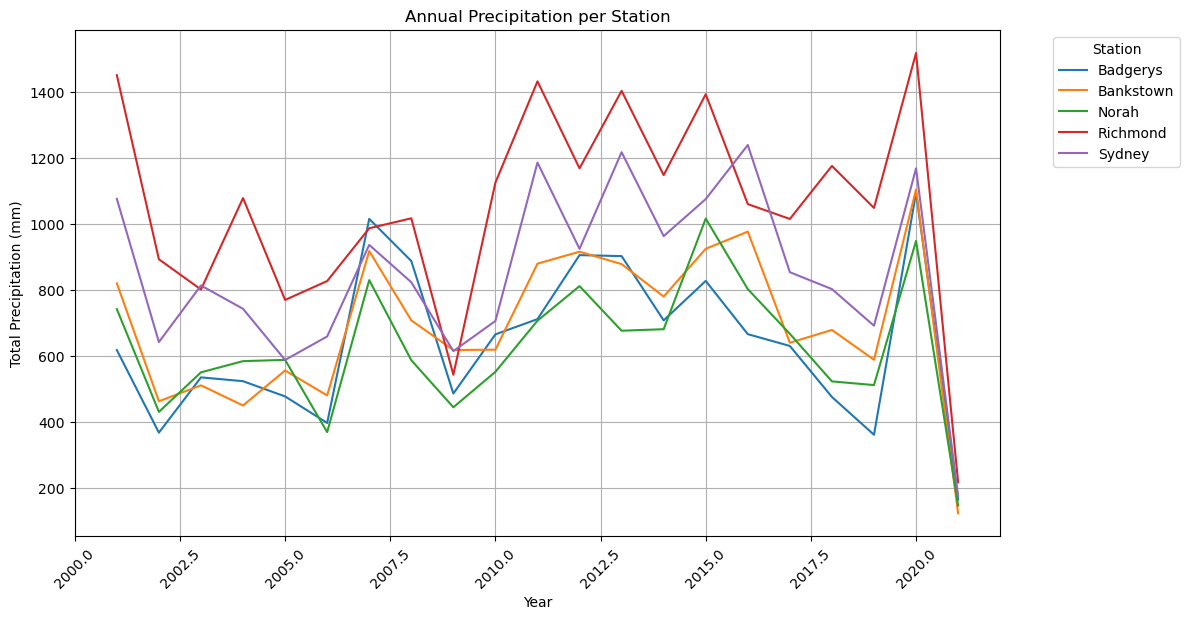

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Time is a datetime type
combined_stations['Time'] = pd.to_datetime(combined_stations['Time'])

# Extract year
combined_stations['Year'] = combined_stations['Time'].dt.year

# Group by Station and Year, then sum precipitation
annual_precip = combined_stations.groupby(['Station_name', 'Year'])['Precipitation'].sum().reset_index()

# Pivot for plotting: each station gets a column
precip_pivot = annual_precip.pivot(index='Year', columns='Station_name', values='Precipitation')

# Plot
plt.figure(figsize=(12, 6))
for station in precip_pivot.columns:
    plt.plot(precip_pivot.index, precip_pivot[station], label=station)

plt.title("Annual Precipitation per Station")
plt.xlabel("Year")
plt.ylabel("Total Precipitation (mm)")
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()



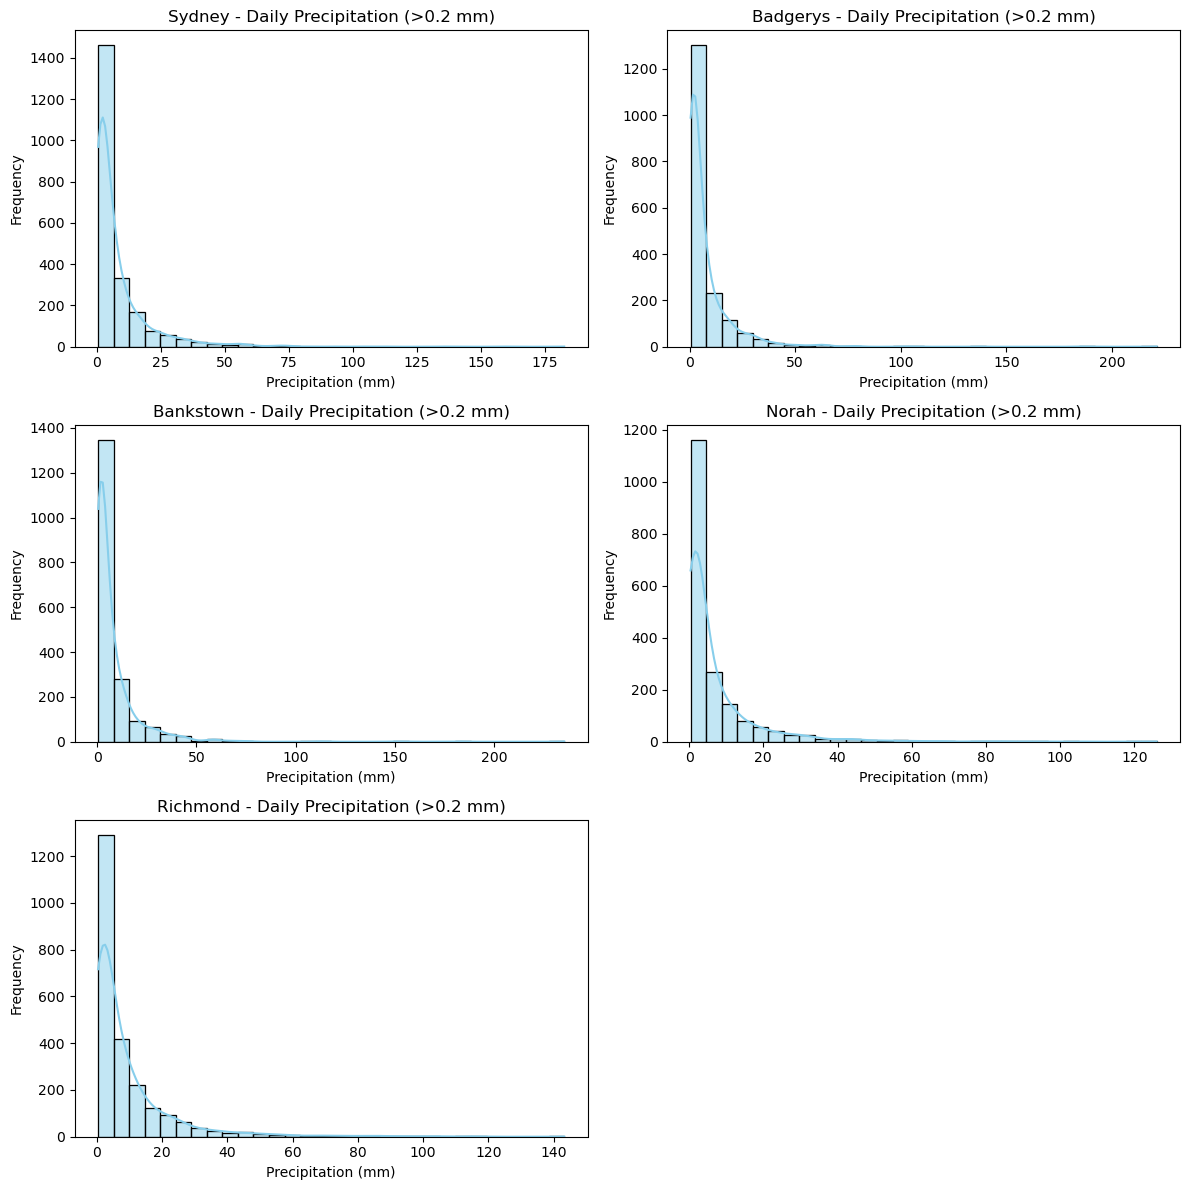

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

stations = combined_stations['Station_name'].unique()
n = len(stations)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()

for i, station in enumerate(stations):
    station_data = combined_stations[
        (combined_stations['Station_name'] == station) &
        (combined_stations['Precipitation'] > 0.2)
    ]

    sns.histplot(
        data=station_data,
        x='Precipitation',
        kde=True,
        bins=30,
        ax=axes[i],
        color='skyblue'
    )
    axes[i].set_title(f'{station} - Daily Precipitation (>0.2 mm)')
    axes[i].set_xlabel('Precipitation (mm)')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


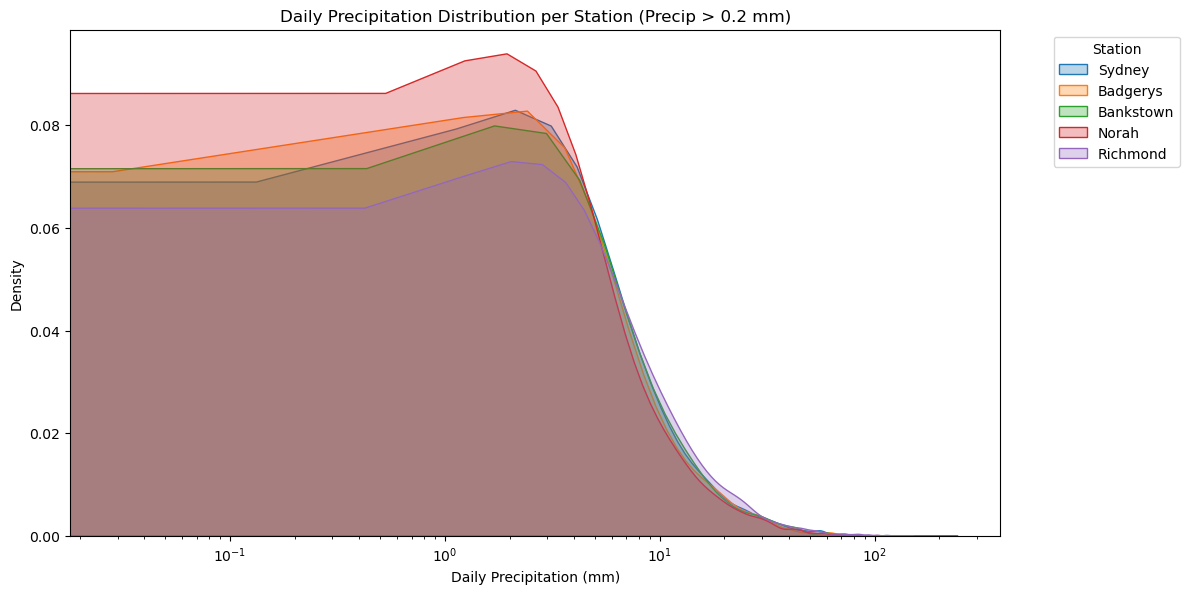

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
stations = combined_stations['Station_name'].unique()

for station in stations:
    station_data = combined_stations[
        (combined_stations['Station_name'] == station) &
        (combined_stations['Precipitation'] > 0.2)
    ]

    if not station_data.empty:
        sns.kdeplot(
            data=station_data,
            x='Precipitation',
            label=station,
            fill=True,
            alpha=0.3
        )

plt.title('Daily Precipitation Distribution per Station (Precip > 0.2 mm)')
plt.xlabel('Daily Precipitation (mm)')
plt.ylabel('Density')
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xscale('log')

plt.show()
